#Part 2: Gaussian Filtering
##1. boxfilter function

In [ ]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
#from IPython.display import Image 


In [ ]:
# This function generate a box filter of size n by n
''' Assume the input n is odd, if it is not, return an assertion error, otherwise
    return a n*n boxfilter whose element sum up to 1, use np.full() to produce such 2d array '''
def boxfilter(n):
    assert n%2 == 1, "dimension must be odd"
    array = np.full((n,n), 1/(n*n))
    array = np.asarray(array)
    return array

In [ ]:
 # Test with n=3 
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
# Test with n=4
boxfilter(4)

AssertionError: ignored

In [ ]:
# Test with n=5
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

## 2. 1D Gaussian filter

In [ ]:
#density function
def f(x, sigma):
    return math.exp(- x**2 / (2*sigma**2))

def gauss1d(sigma):
    # Firstly, calculate the lenth of array:  6 times sigma rounded up to the next odd integer
    lenth = int(np.ceil(sigma * 6))
    if lenth % 2 == 0: 
       lenth += 1
    # Then generate a 1d array of x value
    x = np.arange(-(lenth-1)/2, (lenth+1)/2, 1) 
    # Next pass the 1D array through the given density function, use vectorize function to apply the function to every element of the array
    f2 = np.vectorize(f)
    array = f2(x, sigma)
    array = np.asarray(array)
    # finally normalize the filter value so that they can sum up to 1
    sum = np.sum(array)
    array = array/sum
    array = np.asarray(array)

    return array

In [ ]:
# Test with different sigma values
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [ ]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [ ]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [ ]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

## 3. 2D Gaussian filter

In [ ]:

def gauss2d(sigma):
    #Firstly, generate the 1d Gaussian filter used the given sigma--row, and then change its dimension to 2d in order for the later convolution
    row = gauss1d(sigma)
    row = np.asarray(row)
    row = row[np.newaxis]
    # Generate another 1d Gaussian filter by transpose the 'row'--col
    col = row.T
    row = np.asarray(row)
    col = np.asarray(col)
    # Generate the 2d Gaussian filter by convolute these two 1d filters
    array = signal.convolve2d(row, col,mode='full')
    return array

In [ ]:
# Test with different sigma values
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [ ]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

##4. 
###(a) convolve2d_manual

In [ ]:
# assume the inputs are 2d array
def convolve2d_manual(array, filter):
    # create an empty output array
    array = np.asarray(array)
    num_of_rows = array.shape[0]
    num_of_cols = array.shape[1]
    a = [[0] * num_of_cols for i in range(num_of_rows)]
    #a = np.full((num_of_rows, num_of_cols), 0) 
    # before convolution, first caluculate the pad dimension and pad the original input image with 0
    filter = np.asarray(filter)
    f_num_d = filter.shape[0]
    num_pad = int(np.floor(f_num_d/2))
    new_row= num_of_rows + 2* num_pad
    new_col = num_of_cols + 2* num_pad
    array = np.pad(array,((num_pad,num_pad),(num_pad,num_pad)),'constant',constant_values = (0,0))
    # Use the convolution formula on leture4 slide page73, to slide the filter along the image and do the calculation for each pixel
    k = num_pad
    for x in range(num_of_rows):
        for y in range(num_of_cols):
          for i in range(-1*k, k+1):
             for j in range(-1*k, k+1):
                 a[x][y] += array[num_pad+x+i][num_pad+y+j]*filter[num_pad-1*i][num_pad-1*j]   
    return a

convolve2d_manual([[1,0,0,0,1],
 [2,3,0,8,0],
 [2,0,0,0,3],
 [0,0,1,0,0]],[[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

[[0.6666666666666666, 0.6666666666666666, 1.222222222222222, 1.0, 1.0],
 [0.8888888888888888,
  0.8888888888888888,
  1.222222222222222,
  1.3333333333333333,
  1.3333333333333333],
 [0.7777777777777778,
  0.8888888888888888,
  1.3333333333333333,
  1.3333333333333333,
  1.222222222222222],
 [0.2222222222222222,
  0.3333333333333333,
  0.1111111111111111,
  0.4444444444444444,
  0.3333333333333333]]

###(b) gaussconvolve2d_manual

In [ ]:
def gaussconvolve2d_manual(array,sigma):
    filter = gauss2d(sigma)
    a = convolve2d_manual(array, filter)
    return a


###(c) Apply the gaussconvolve2d_manual to image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#open the dog image
im = Image.open('/content/drive/MyDrive/cs425/dog.jpg')
im.show()
#turn to grey scale and save
im2 = im.copy()
im2 = im2.convert('L')
# covert to numpy array
im2_array = np.asarray(im2)
#apply the filter and covert the array back to unsigned integer format for storage and display
im2_array = gaussconvolve2d_manual(im2_array,3)
im2_array = np.asarray(im2_array)
im2_array = im2_array.astype('uint8')
im2 = Image.fromarray(im2_array)
im2.save('dog_new.png','PNG')
im2.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###(d) show the images
#### original:

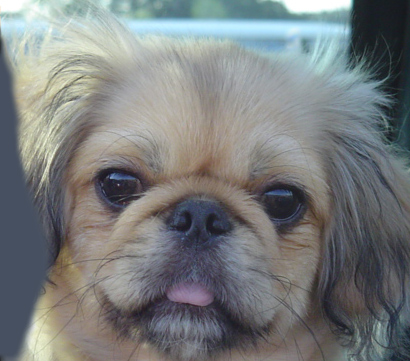

In [ ]:
display(im)

#### filtered:

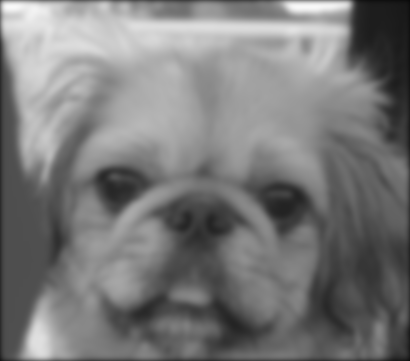

In [ ]:
display(im2)

##5.
###(a) gaussconvolve2d_scipy

In [ ]:
def gaussconvolve2d_scipy(array,sigma):
    filter = gauss2d(sigma)
    a = signal.convolve2d(array,filter,'same')
    return a


####Question: Why does Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d’? 
Answer: When the filters are symmetric (like gaussian or box filters) there is no difference between correlation and convolution (when we apply the filter ‘gauss2d’. However, there is a difference when the filter is asymmetric because in convolution the filter needs to be rotated 180 degrees. That's why Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d

###(b) apply the filter gaussconvolve2d_scipy


In [ ]:
#open the dog image
im = Image.open('/content/drive/MyDrive/cs425/dog.jpg')
im.show()
#turn to grey scale and save
im3 = im.copy()
im3 = im3.convert('L')
# covert to numpy array
im3_array = np.asarray(im3)
#apply the filter and covert the array back to unsigned integer format for storage and display
im3_array = gaussconvolve2d_scipy(im3_array,3)
im3_array = np.asarray(im3_array)
im3_array = im3_array.astype('uint8')
im3 = Image.fromarray(im3_array)
im3.save('dog_new_ver3.png','PNG')
im3.show()


###(c) show the images
#### original:

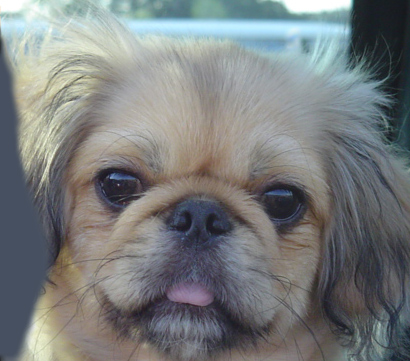

In [ ]:
display(im)

#### filtered:

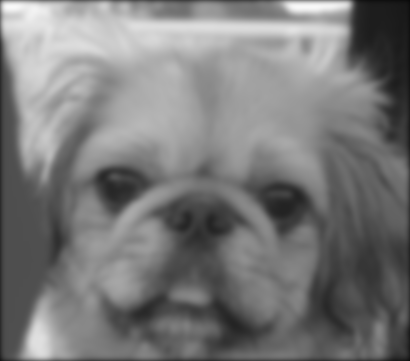

In [ ]:
display(im3)

##6. Efficiency--time used

In [ ]:
# Performance of 'gaussconvolve2d_manual' when sigma = 10

import time
#open the dog image
im = Image.open('/content/drive/MyDrive/cs425/dog.jpg')
im.show()
#turn to grey scale and save
im5 = im.copy()
im5 = im5.convert('L')
# covert to numpy array
im5_array = np.asarray(im5)
#apply the filter and covert the array back to unsigned integer format for storage and display
t1 = time.time() # start timestamp
#since sigma=10 took too long to run, change to 6 for now
im5_array = gaussconvolve2d_manual(im5_array,6)
duration = time.time() - t1 # duration in seconds
print(duration)


#Total running time: 685.1878128051758

685.1878128051758


In [ ]:

# Performance of 'gaussconvolve2d_scipy' when sigma = 10
im = Image.open('/content/drive/MyDrive/cs425/dog.jpg')
im.show()
#turn to grey scale and save
im4 = im.copy()
im4 = im4.convert('L')
# covert to numpy array
im4_array = np.asarray(im4)
#apply the filter and covert the array back to unsigned integer format for storage and display
t1 = time.time() # start timestamp
#since sigma=10 took too long for manul function to run, change to 6 for now
im4_array = gaussconvolve2d_scipy(im4_array,6)
duration = time.time() - t1 # duration in seconds
print(duration)


## Total running time: 0.5876686573028564

0.5876686573028564


It turns out that the running time of gaussconvolve2d_scipy is significantly faster than that of gaussconvolve2d_manual. Since I implemented gaussconvolve2d_manual using 4 nested for-loops which is run in O(n^2*m^2), this tells us we should avoid using for loops as much as possible in order for the efficiency

##7. 
#### Question: explain how this could be implemented more efficiently taking advantage of separability and why

 Since the 2d gaussian filter array is separable, we can written it as the product of two functions, one function only of x and the other only for y. Then we can convovle each row of pixels with a 1d filter and then convovle each columns with a 1d filter. In this way, at each pixel (x,y), it will reduce m^2 multiplications to 2m multiplications and the total running time will be reduce to O(2m*n^2)

#Part3 Hybrid Images
##1. Blurred Image (Low frequency)



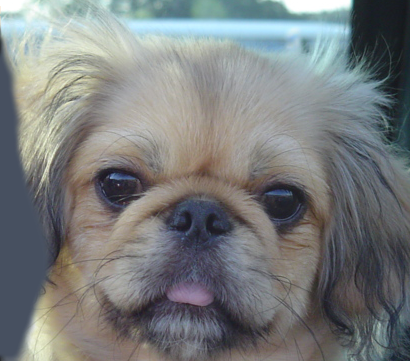

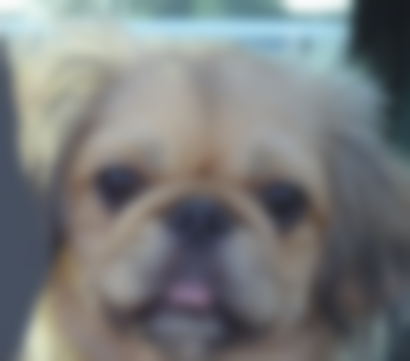

In [ ]:
from scipy.ndimage import gaussian_filter
im = Image.open('/content/drive/MyDrive/cs425/0b_dog.bmp')
im.show()
im6 = im.copy()
# covert to numpy array
im6_array = np.asarray(im6)

#separete the color channels (RGB)
r = im6_array[:,:,0]
g = im6_array[:,:,1]
b = im6_array[:,:,2]

#apply the filter separately
r_new = gaussian_filter(r, sigma=6)
g_new = gaussian_filter(g, sigma=6)
b_new = gaussian_filter(b, sigma=6)

# combine 3 channels back together
a = r_new
a = a[:, :, np.newaxis]
a[:,:,0] = r_new
g_new = g_new[:, :, np.newaxis]
a = np.concatenate([a,g_new],axis=2)
b_new = b_new[:, :, np.newaxis]
a = np.concatenate([a,b_new],axis=2)
#print(a)

#save the new image and display
a = np.asarray(a)
a = a.astype('uint8')
im6 = Image.fromarray(a)
im6.save('dog_new_part3(1)_blur.png','PNG')
im6.show()
#original
display(im)
#Gaussian filtered low frequencies image
display(im6)

###2. High frequency image

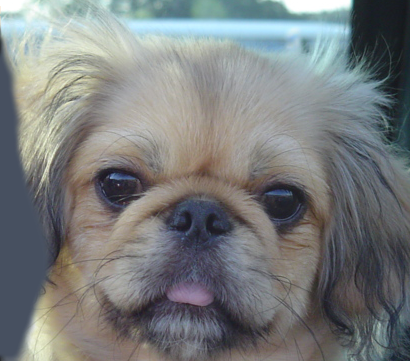

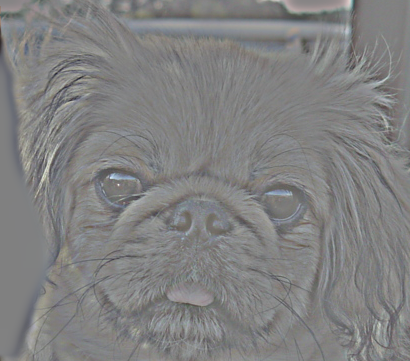

In [ ]:
im = Image.open('/content/drive/MyDrive/cs425/0b_dog.bmp')
im.show()
im7 = im.copy()
# covert to numpy array
im7_array = np.asarray(im7)

#separete the color channels (RGB)
r = im7_array[:,:,0]
g = im7_array[:,:,1]
b = im7_array[:,:,2]

#apply the filter separately
r_new = gaussian_filter(r, sigma=6)
g_new = gaussian_filter(g, sigma=6)
b_new = gaussian_filter(b, sigma=6)

#Substract from the original and adjust negative values
r_new = r-r_new
g_new = g-g_new
b_new = b-b_new

r_new += 128
g_new += 128
b_new += 128

# combine 3 channels back together
a = r_new
a = a[:, :, np.newaxis]
a[:,:,0] = r_new
g_new = g_new[:, :, np.newaxis]
a = np.concatenate([a,g_new],axis=2)
b_new = b_new[:, :, np.newaxis]
a = np.concatenate([a,b_new],axis=2)
#print(a)

#save the new image and display
a = np.asarray(a)
a = a.astype('uint8')
im7 = Image.fromarray(a)
im7.save('dog_new_part3(2)_blur.png','PNG')
im7.show()
#original
display(im)
#High frequencies image
display(im7)

###3. Hybrid Images

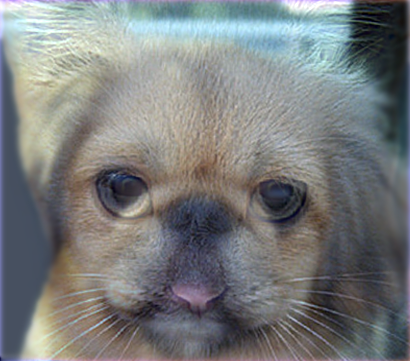

In [ ]:
# Define a function output a hybrid image based on the given input image and sigma
def hybrid_img(image1, image2, sig):
    im1 = image1.copy()
    # covert to numpy array
    im1_array = np.asarray(im1)
    #separete the color channels (RGB)
    r = im1_array[:,:,0]
    g = im1_array[:,:,1]
    b = im1_array[:,:,2]

    #apply the filter separately, calculate the low frequency image1
    r_low = gaussconvolve2d_scipy(r, sigma = sig)
    g_low = gaussconvolve2d_scipy(g, sigma = sig)
    b_low = gaussian_filter(b, sigma = sig)

    im2 = image2.copy()
    # covert to numpy array
    im2_array = np.asarray(im2)
    #separete the color channels (RGB)
    r2 = im2_array[:,:,0]
    g2= im2_array[:,:,1]
    b2 = im2_array[:,:,2]

    r2_low = gaussconvolve2d_scipy(r2, sigma = sig)
    g2_low = gaussconvolve2d_scipy(g2, sigma = sig)
    b2_low = gaussconvolve2d_scipy(b2, sigma = sig)
    #calculate the high frequence image2: Substract from the original and adjust out of range values
    r_high = r2-r2_low
    g_high = g2-g2_low
    b_high = b2-b2_low

    r_new = r_low + r_high
    g_new = g_low + g_high
    b_new = b_low + b_high

    
    # combine 3 channels back together
    a = r_new
    a = a[:, :, np.newaxis]
    a[:,:,0] = r_new
    g_new = g_new[:, :, np.newaxis]
    a = np.concatenate([a,g_new],axis=2)
    b_new = b_new[:, :, np.newaxis]
    a = np.concatenate([a,b_new],axis=2)
    a = np.asarray(a)
    # clamp the value of pixels
    np.clip(a, 0, 255,a)
    a = a.astype('uint8')
    img = Image.fromarray(a)
    img.show()
    display(img)
    

#save the new image and display
im1 = Image.open('/content/drive/MyDrive/cs425/0a_cat.bmp')
im2 = Image.open('/content/drive/MyDrive/cs425/0b_dog.bmp')
hybrid_img(im2, im1, 3)

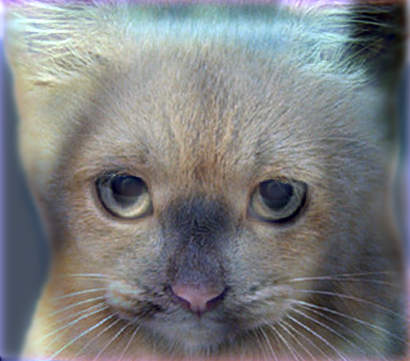

In [ ]:
hybrid_img(im2, im1, 6)


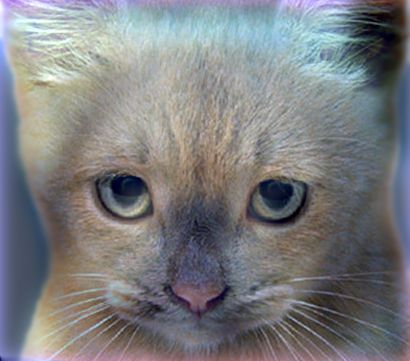

In [ ]:
hybrid_img(im2, im1, 10)

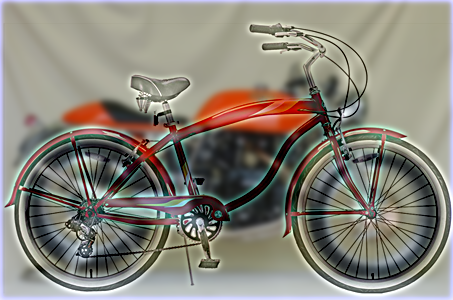

In [ ]:
#Second set of images
im3 = Image.open('/content/drive/MyDrive/cs425/1a_bicycle.bmp')
im4 = Image.open('/content/drive/MyDrive/cs425/1b_motorcycle.bmp')
hybrid_img(im4, im3, 3)

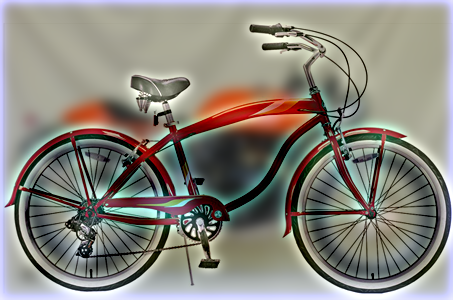

In [ ]:

hybrid_img(im4, im3, 6)

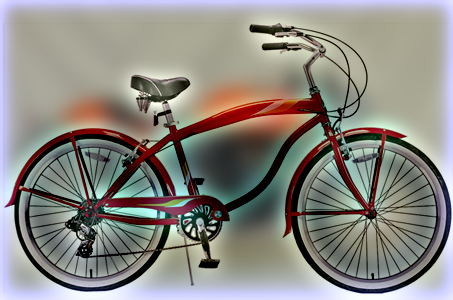

In [ ]:

hybrid_img(im4, im3, 10)

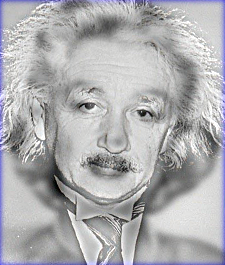

In [ ]:
#third set of images
im5 = Image.open('/content/drive/MyDrive/cs425/2a_einstein.bmp')
im6 = Image.open('/content/drive/MyDrive/cs425/2b_marilyn.bmp')
hybrid_img(im6, im5, 3)

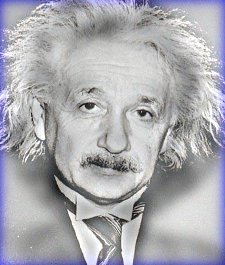

In [ ]:
hybrid_img(im6, im5, 6)

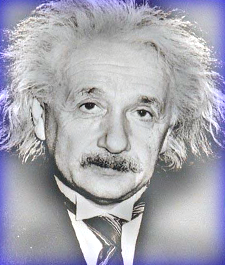

In [ ]:
hybrid_img(im6, im5, 10)

#Part4 Playing with Different Denoising Filters 
##1. Play with different filters to denoise image

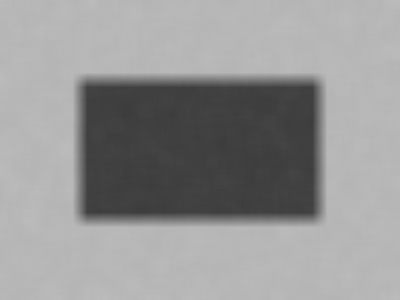

In [ ]:

import cv2
#read the image
gau = cv2.imread('/content/drive/MyDrive/cs425/box_gauss.png')
spec = cv2.imread('/content/drive/MyDrive/cs425/box_speckle.png')
#Apply Gaussian filter 
im1 = cv2.GaussianBlur(gau, ksize=(15, 15), sigmaX=25)
im2 = cv2.GaussianBlur(spec, ksize=(15, 15), sigmaX=25)
#Apply bilateral filter
im3 = cv2.bilateralFilter(gau, 15, sigmaColor=200, sigmaSpace=200)
im4 = cv2.bilateralFilter(spec, 15, sigmaColor=200, sigmaSpace=200)
#Apply median filter
im5 = cv2.medianBlur(gau,5)
im6 = cv2.medianBlur(spec,5)
#write the images
cv2.imwrite('/content/drive/MyDrive/cs425/box_gauss_gaussian.png', im1)
cv2.imwrite('/content/drive/MyDrive/cs425/box_speckle_gaussian.png', im2)
cv2.imwrite('/content/drive/MyDrive/cs425/box_gauss_bilateral.png', im3)
cv2.imwrite('/content/drive/MyDrive/cs425/box_speckle_bilateral.png', im4)
cv2.imwrite('/content/drive/MyDrive/cs425/box_gauss_median.png', im5)
cv2.imwrite('/content/drive/MyDrive/cs425/box_speckle_median.png', im6)
#show the images
im1 = Image.open('/content/drive/MyDrive/cs425/box_gauss_gaussian.png')
im1.show()
display(im1)





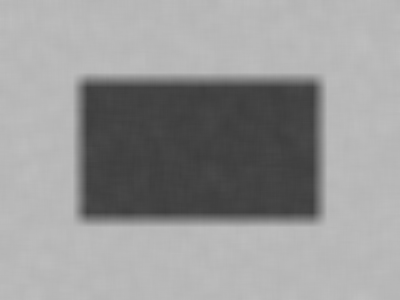

In [ ]:
im2 = Image.open('/content/drive/MyDrive/cs425/box_speckle_gaussian.png')
im2.show()
display(im2)

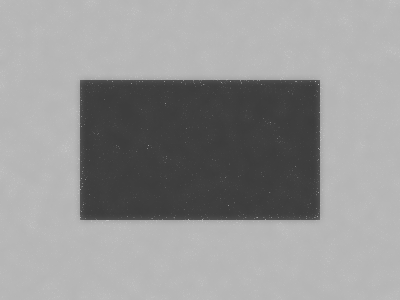

In [ ]:
im3 = Image.open('/content/drive/MyDrive/cs425/box_gauss_bilateral.png')
im3.show()
display(im3)

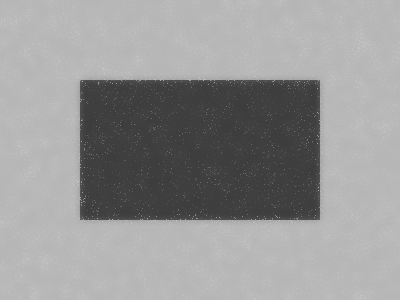

In [ ]:
im4 = Image.open('/content/drive/MyDrive/cs425/box_speckle_bilateral.png')
im4.show()
display(im4)

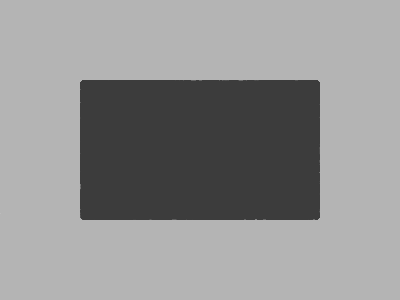

In [ ]:

im5 = Image.open('/content/drive/MyDrive/cs425/box_gauss_median.png')
im5.show()
display(im5)

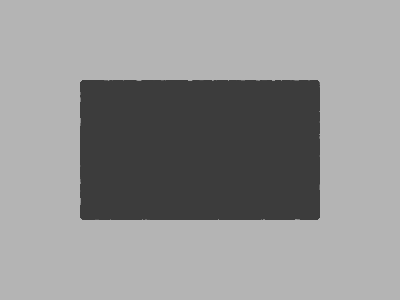

In [ ]:
im6 = Image.open('/content/drive/MyDrive/cs425/box_speckle_median.png')
im6.show()
display(im6)

###2.


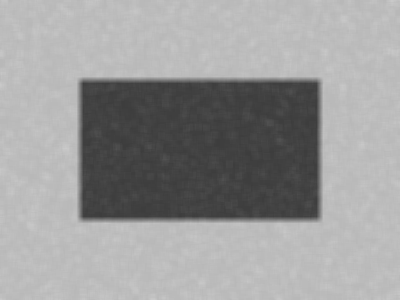

In [ ]:

#read the image
# gau = cv2.imread('/content/drive/MyDrive/cs425/box_gauss.png')
# spec = cv2.imread('/content/drive/MyDrive/cs425/box_speckle.png')
#Apply Gaussian filter 
im1 = cv2.GaussianBlur(gau, ksize=(7, 7), sigmaX=50)
im2 = cv2.GaussianBlur(spec, ksize=(7, 7), sigmaX=50)
#Apply bilateral filter
im3 = cv2.bilateralFilter(gau, 7, sigmaColor=150, sigmaSpace=150)
im4 = cv2.bilateralFilter(spec, 7, sigmaColor=150, sigmaSpace=150)
#Apply median filter
im5 = cv2.medianBlur(gau,7)
im6 = cv2.medianBlur(spec,7)
#write the images
cv2.imwrite('/content/drive/MyDrive/cs425/box_gauss_gaussian_2.png', im1)
cv2.imwrite('/content/drive/MyDrive/cs425/box_speckle_gaussian_2.png', im2)
cv2.imwrite('/content/drive/MyDrive/cs425/box_gauss_bilateral_2.png', im3)
cv2.imwrite('/content/drive/MyDrive/cs425/box_speckle_bilateral_2.png', im4)
cv2.imwrite('/content/drive/MyDrive/cs425/box_gauss_median_2.png', im5)
cv2.imwrite('/content/drive/MyDrive/cs425/box_speckle_median_2.png', im6)
#show the images
im1 = Image.open('/content/drive/MyDrive/cs425/box_gauss_gaussian_2.png')
im1.show()
display(im1)


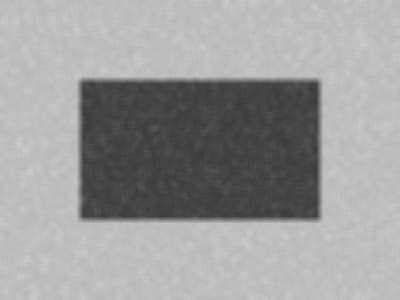

In [ ]:
im2 = Image.open('/content/drive/MyDrive/cs425/box_speckle_gaussian_2.png')
im2.show()
display(im2)

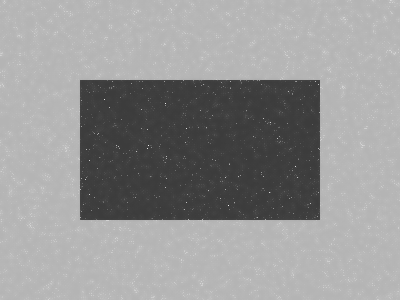

In [ ]:
im3 = Image.open('/content/drive/MyDrive/cs425/box_gauss_bilateral_2.png')
im3.show()
display(im3)

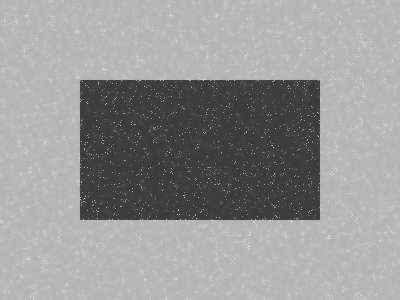

In [ ]:
im4 = Image.open('/content/drive/MyDrive/cs425/box_speckle_bilateral_2.png')
im4.show()
display(im4)

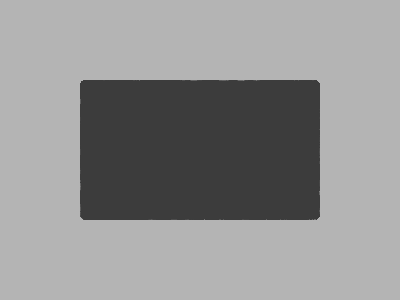

In [ ]:
im5 = Image.open('/content/drive/MyDrive/cs425/box_gauss_median_2.png')
im5.show()
display(im5)

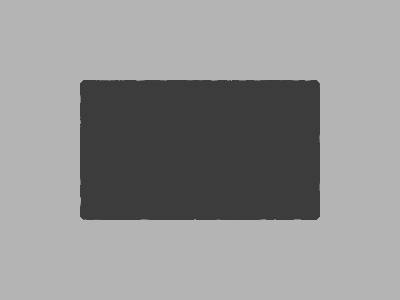

In [ ]:
im6 = Image.open('/content/drive/MyDrive/cs425/box_speckle_median_2.png')
im6.show()
display(im6)

#####Gaussian filter
######Pros: It helps to blur the whole image so that it is hard to see the noises

######Cons: However, the other contents also got blurred which makes it less clearer

#####Bilateral filter
######Pros: The whole image content still very clear and nothing has been dropped

######Cons: However the noises still remain very clear, so the denoise effect of this filter is the worst

#####Median filter
######Pros: The denoise effect of this filter is the best, it helps to smooth almost all the nosies

######Cons: However, the angle of the image content get rounded (the 90 degree angle has been applied the round effect)


